#Analisis Regresion Lineal - TITANIC

### Instalacion de las librerias a utilizar

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt


### Importacion de Data 

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

### Primera acercacion a los datos 


In [4]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


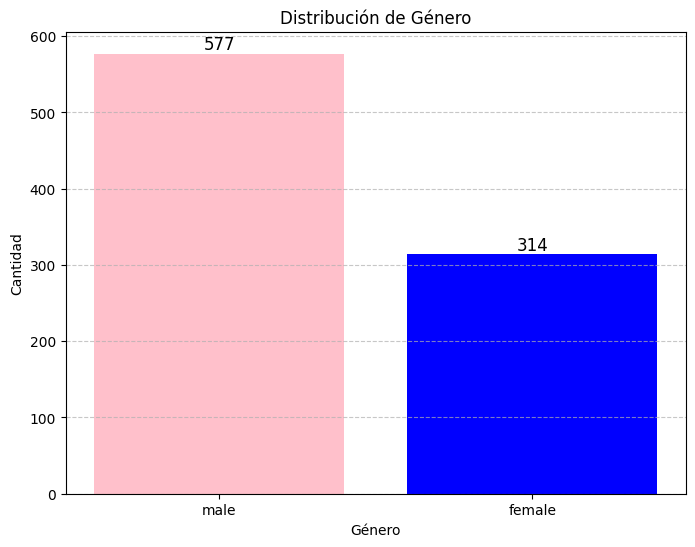

In [6]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom', fontsize=12)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
supervivientes = df['Survived'].value_counts()

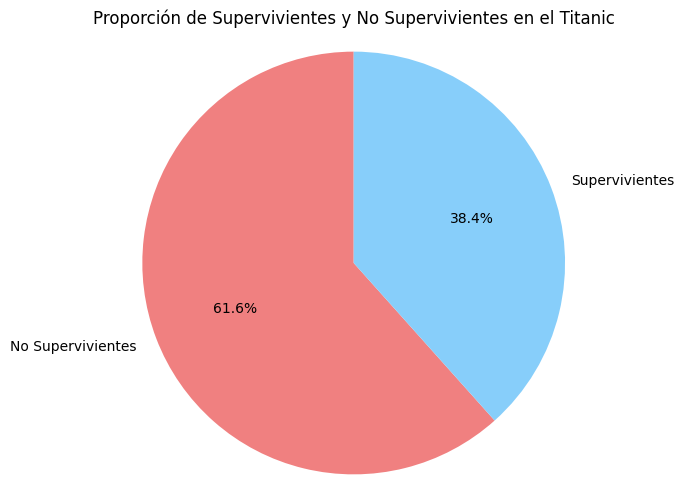

In [8]:
plt.figure(figsize=(6, 6)) 
plt.pie(supervivientes, labels=['No Supervivientes', 'Supervivientes'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Proporción de Supervivientes y No Supervivientes en el Titanic') 
plt.axis('equal') 
plt.show()

### Observamos que tenemos problemas de datos vacios en algunas columnnas y por consiguinte lo remplazaremos con datos promedio y con datos default y ademas eliminaremos columnas que no aportan informacion valiosa dentro de nuestro analisis  

### Limpieza de Datos 

In [9]:
df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
print("Cantidad de Registros con cero en Edad: ",df['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de Ticket: ",df['Fare'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Precio de Ticket:  15


In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [14]:
df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [17]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
5,0,3,0,28.0,0,0,8.4583,1.0
6,0,1,0,54.0,0,0,51.8625,2.0
7,0,3,0,2.0,3,1,21.0750,2.0
8,1,3,1,27.0,0,2,11.1333,2.0
9,1,2,1,14.0,1,0,30.0708,0.0


In [18]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


## Visualizacion de Distribucion de datos 


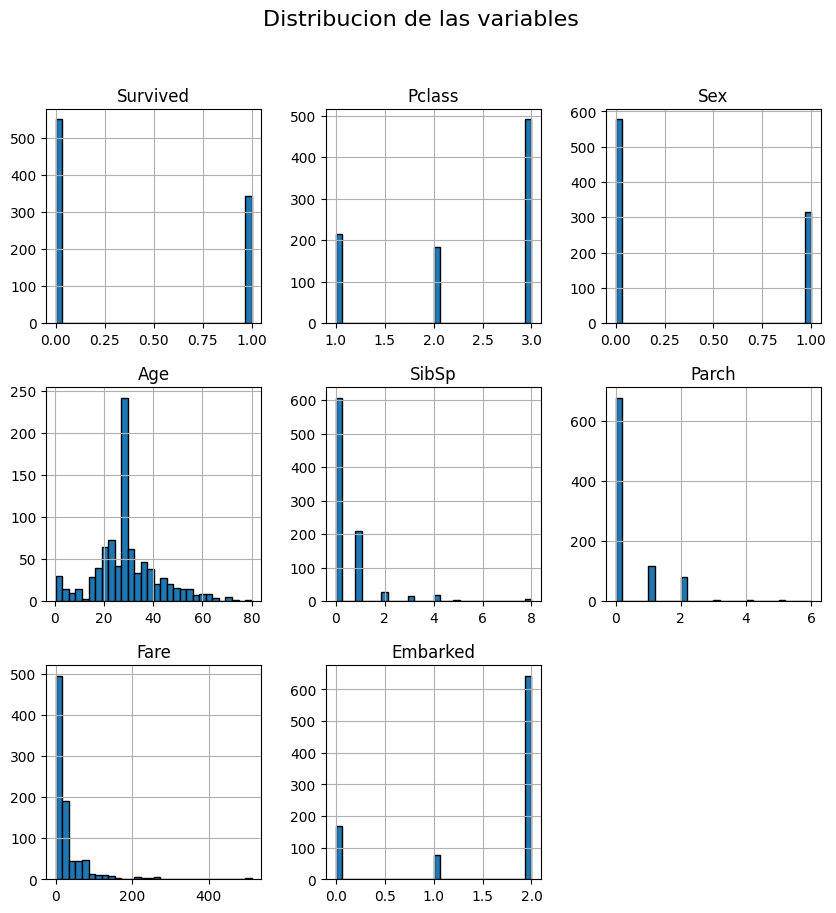

In [20]:
df.hist(figsize=(10,10),bins=30, edgecolor="black")
plt.suptitle("Distribucion de las variables",fontsize=16)
plt.show()

### Podemos observar que la data esta completa y las columnas que no  nos interesan para este analisis fueron eliminadas 

#### Visualizacion de datos atipicos 

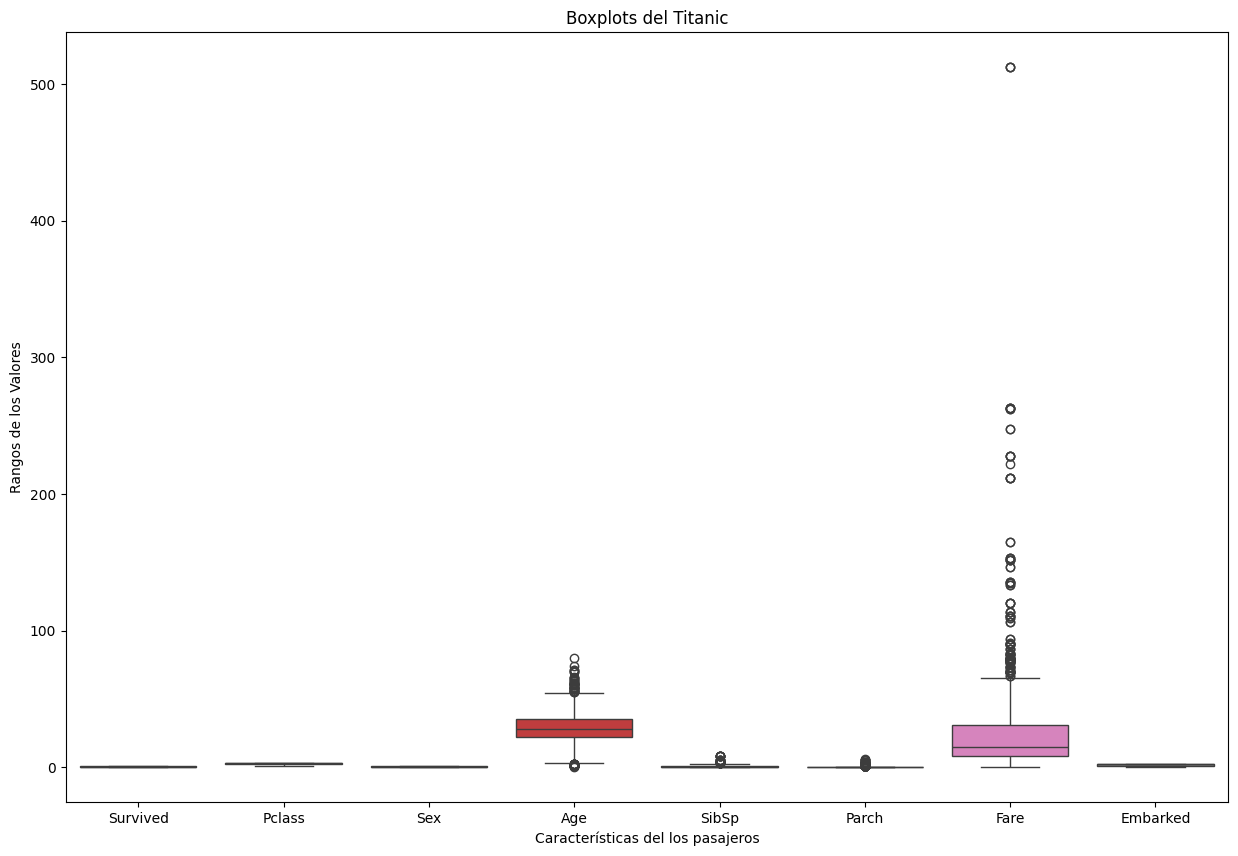

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots del Titanic')
plt.xlabel('Características del los pasajeros')
plt.ylabel('Rangos de los Valores')
plt.show()

#### Observamos que en Fare estan marcados los mas datos atipicos 

## Eliminacion de Datos Atipicos 

In [22]:
q1 = df['Fare'].quantile(0.15)
q3 = df['Fare'].quantile(0.85)


df_filtrada = df[(df['Fare'] >= q1) & (df['Fare'] <= q3)]

print(df_filtrada)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
2           1       3    1  26.0      0      0   7.9250       2.0
3           1       1    1  35.0      1      0  53.1000       2.0
4           0       3    0  35.0      0      0   8.0500       2.0
5           0       3    0  28.0      0      0   8.4583       1.0
6           0       1    0  54.0      0      0  51.8625       2.0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000       2.0
887         1       1    1  19.0      0      0  30.0000       2.0
888         0       3    1  28.0      1      2  23.4500       2.0
889         1       1    0  26.0      0      0  30.0000       0.0
890         0       3    0  32.0      0      0   7.7500       1.0

[656 rows x 8 columns]


In [23]:
df=df_filtrada

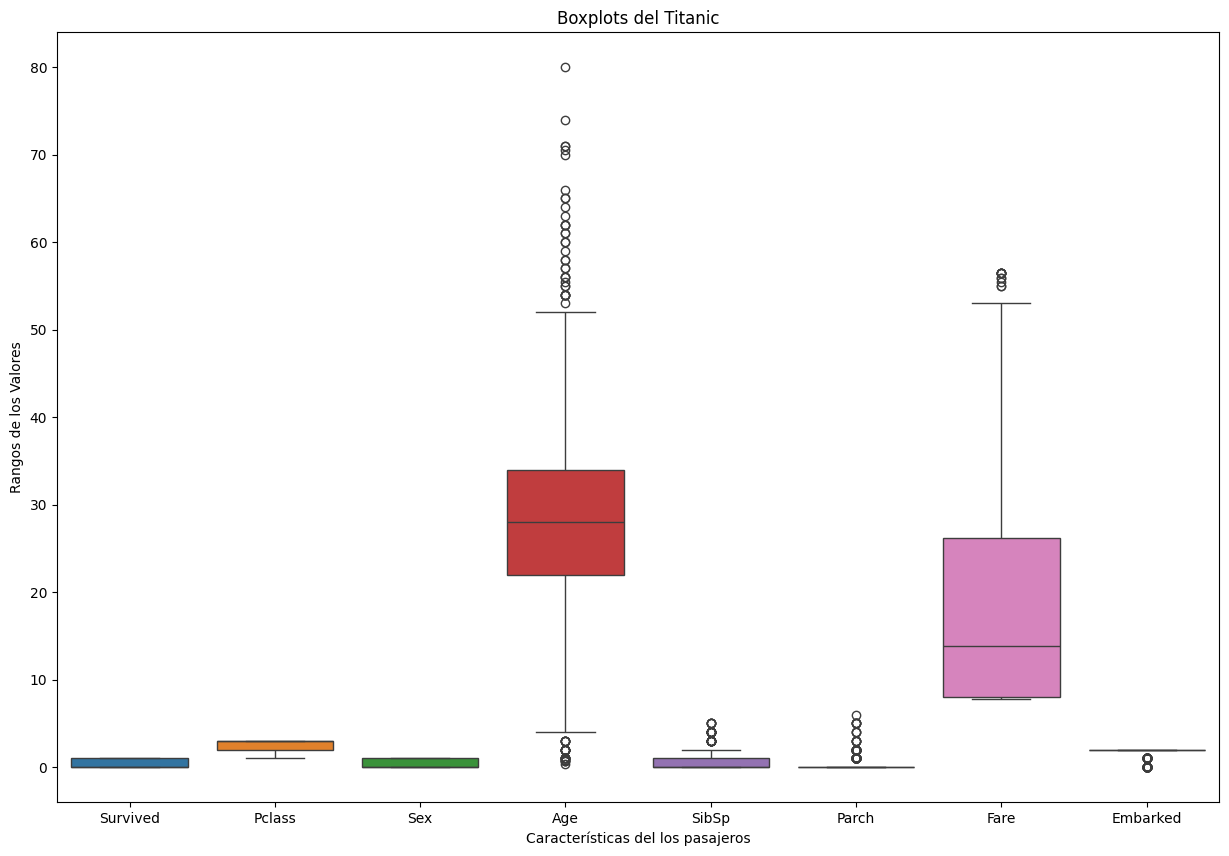

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots del Titanic')
plt.xlabel('Características del los pasajeros')
plt.ylabel('Rangos de los Valores')
plt.show()

In [25]:
df.head(400
        )

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
5,0,3,0,28.0,0,0,8.4583,1.0
6,0,1,0,54.0,0,0,51.8625,2.0
...,...,...,...,...,...,...,...,...
534,0,3,1,30.0,0,0,8.6625,2.0
535,1,2,1,7.0,0,2,26.2500,2.0
536,0,1,0,45.0,0,0,26.5500,2.0
538,0,3,0,28.0,0,0,14.5000,2.0


In [26]:
df['Age'].fillna(df['Age'].median())

2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 656, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 2 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  656 non-null    int64  
 1   Pclass    656 non-null    int64  
 2   Sex       656 non-null    int64  
 3   Age       656 non-null    float64
 4   SibSp     656 non-null    int64  
 5   Parch     656 non-null    int64  
 6   Fare      656 non-null    float64
 7   Embarked  656 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 46.1 KB


### Representacion grafica despues de la limpeza de datos 

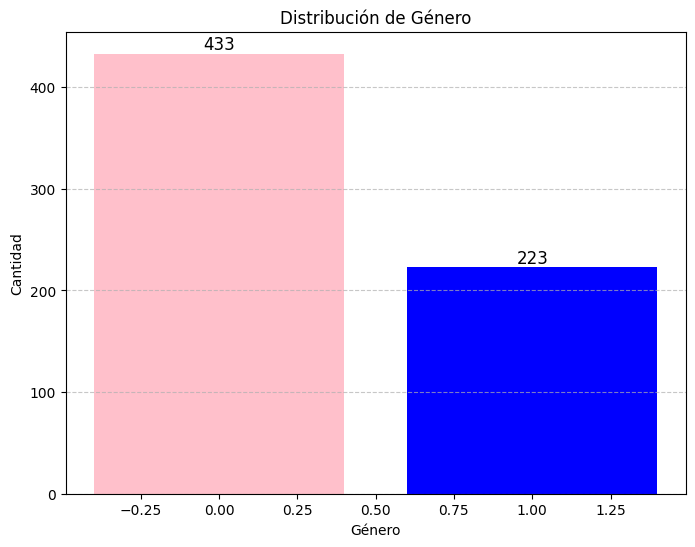

In [28]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom', fontsize=12)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Mapa de correlacion de datos 

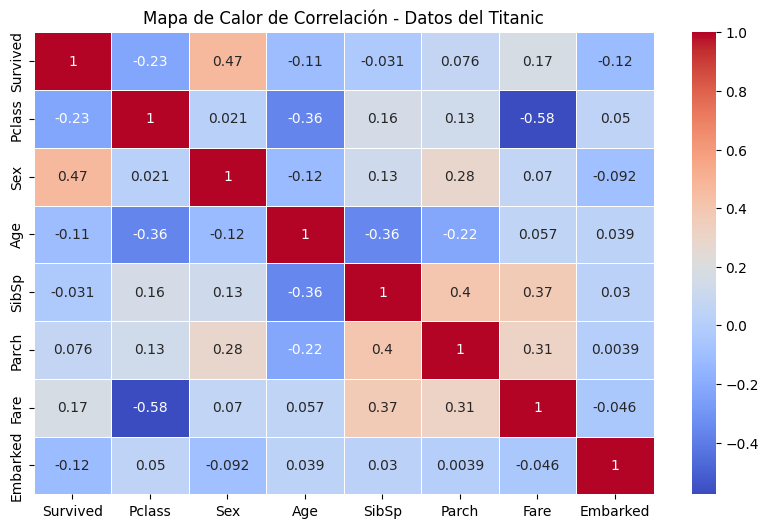

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación - Datos del Titanic') 
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 2 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  656 non-null    int64  
 1   Pclass    656 non-null    int64  
 2   Sex       656 non-null    int64  
 3   Age       656 non-null    float64
 4   SibSp     656 non-null    int64  
 5   Parch     656 non-null    int64  
 6   Fare      656 non-null    float64
 7   Embarked  656 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 46.1 KB


# Creacion del modelo de regresion lineal 

In [31]:
X = df[['Age']] # Variable independiente 
y = df['Fare']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# modelo = LinearRegression() 
# modelo.fit(X, y)

In [34]:
modelo = LinearRegression() 
modelo.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = modelo.predict(X_test)

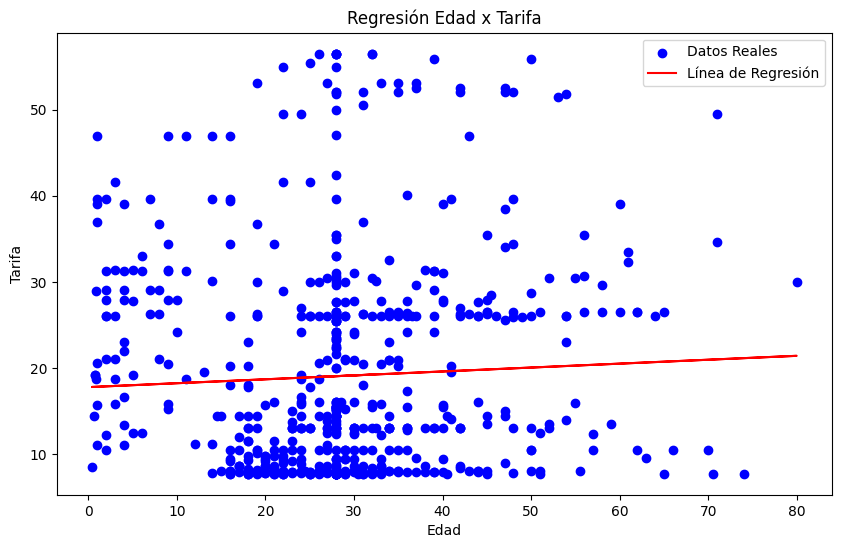

In [36]:
# Crear la gráfica de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], y, color='blue', label='Datos Reales')
plt.plot(df['Age'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Edad x Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend()
plt.show()


In [37]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 131.2120913301094
R^2 Score: -0.003694795474846302


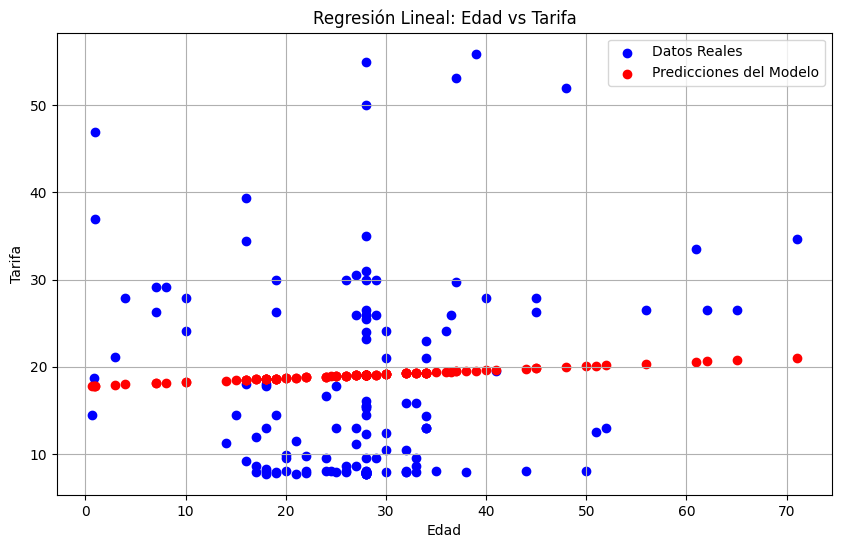

In [38]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, color='blue', label='Datos Reales')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicciones del Modelo')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Regresión Lineal: Edad vs Tarifa')
plt.legend()
plt.grid(True)
plt.show()



## Prueba del modelo 


In [39]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Fare']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [41]:


y_pred = modelo.predict(X_test)


In [42]:

nuevo_pasajero = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],
    'Age': [30],
    'SibSp': [0],
    'Parch': [0],
    'Embarked': [2]
})

prediccion_tarifa = modelo.predict(nuevo_pasajero)

print(f'La tarifa predicha si existiera un nuevo pasajero es: ${prediccion_tarifa[0]:.2f}')


La tarifa predicha si existiera un nuevo pasajero es: $31.84


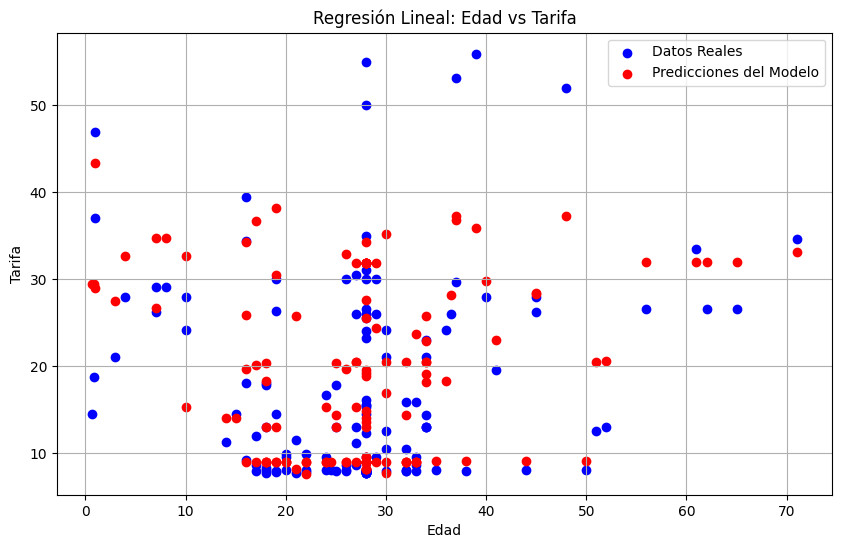

In [43]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, color='blue', label='Datos Reales')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicciones del Modelo')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Regresión Lineal: Edad vs Tarifa')
plt.legend()
plt.grid(True)
plt.show()


# Conclusiones 
El análisis de los datos del Titanic permitió identificar los principales factores que influenciaron las tarifas pagadas por los pasajeros, destacando cómo la estructura socioeconómica se reflejó en los precios. La variable más influyente fue la clase del boleto (Pclass), donde los pasajeros de primera clase pagaron significativamente más que los de segunda o tercera, evidenciando una jerarquización económica. Además, el número de acompañantes (SibSp y Parch) también mostró una relación positiva con las tarifas, sugiriendo costos mayores para grupos o familias. La edad, sin embargo, tuvo un impacto leve, indicando que no fue un criterio central en la fijación de precios.

Este fue el factor más influyente en las tarifas. Los pasajeros de primera clase pagaron considerablemente más que los de segunda y tercera. El modelo mostró un coeficiente negativo para esta variable, indicando que, a medida que aumentaba el número de la clase (menos lujosa), la tarifa disminuía significativamente.

Estas variables tuvieron un impacto positivo en las tarifas. Los pasajeros que viajaban con más familiares o acompañantes tendieron a pagar tarifas más altas. Este resultado sugiere que los grupos familiares o reservas conjuntas tenían costos más elevados, probablemente debido a que requerían más espacio o paquetes especiales.

Aunque la edad tuvo un impacto menos significativo, se observó cierta variabilidad en las tarifas, particularmente en pasajeros más jóvenes. Esto podría estar relacionado con tarifas especiales para niños o patrones de compra entre familias.
Rendimiento del modelo:

El modelo de regresión lineal presentó un error cuadrático medio (MSE) razonable, reflejando una capacidad adecuada para capturar las tendencias generales. Sin embargo, mostró limitaciones al predecir tarifas extremas, especialmente las más altas, lo que sugiere que factores no incluidos, como el puerto de embarque (Embarked) o las características específicas de la cabina, podrían influir significativamente.

El modelo de regresión lineal, aunque útil, presentó limitaciones, con un error cuadrático medio de 3424.57, y no capturó completamente las variaciones en tarifas más altas. Esto indica que factores adicionales, como la ubicación de la cabina o servicios específicos, podrían ser relevantes.
